### Noise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray, gray2rgb
from skimage.util import random_noise
from scipy.ndimage import uniform_filter, median_filter, gaussian_filter

# ONly if you have jupyter themes
from jupyterthemes import jtplot
jtplot.style()

### Loading image

In [2]:
moon = imread('images/480px-Full_moon.jpeg')
moon_grey = rgb2gray(moon)

In [3]:
moon.dtype

dtype('uint8')

In [4]:
def imshow_gray(image, size = (10,10)):
    plt.figure(figsize=size)
    plt.imshow(image, cmap = plt.cm.gray), plt.axis('off')
    plt.show()

### Generate some noise

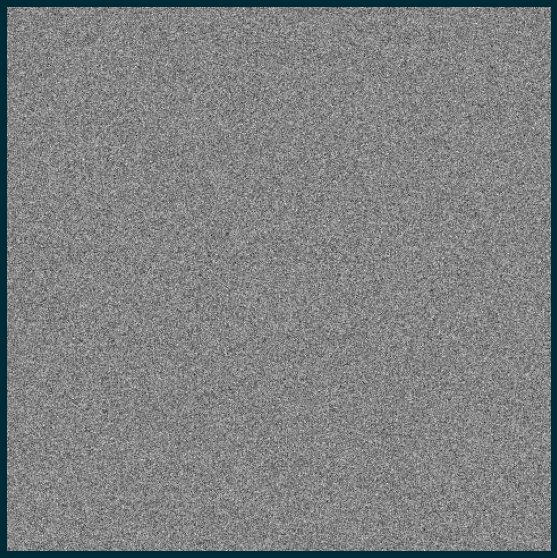

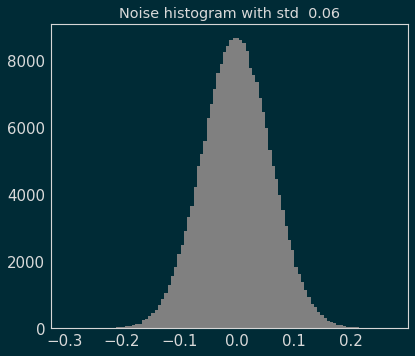

In [5]:
noise1 = np.random.normal(scale=0.06, size=moon_grey.shape)
imshow_gray(noise1)

def plot_hist(img, bins=20):
    plt.grid()
    plt.hist(np.ravel(img), bins=bins, color='gray')
    plt.tick_params(axis='both', labelsize=15)
    plt.title(f"Noise histogram with std  {np.std(img):.2f}")

plot_hist(noise1, 100)


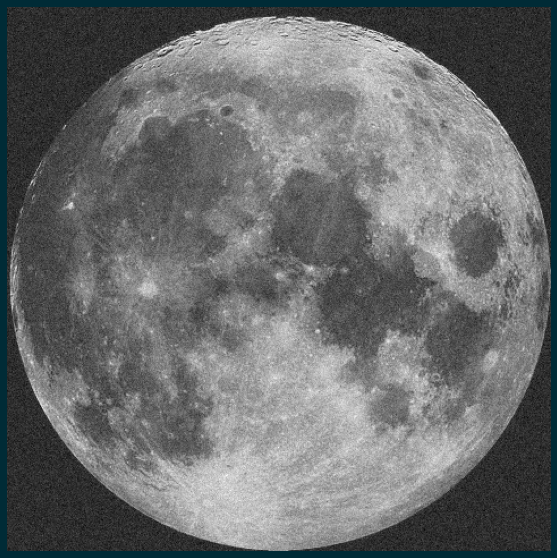

In [6]:
noisy_moon = noise1 + moon_grey
imshow_gray(noisy_moon)

In [7]:
def plot_line(image, position, size = (20,10)):
    plt.figure(figsize=size)
    plt.plot(image[position, :])
    plt.show()

In [8]:
moon_grey.shape

(480, 480)

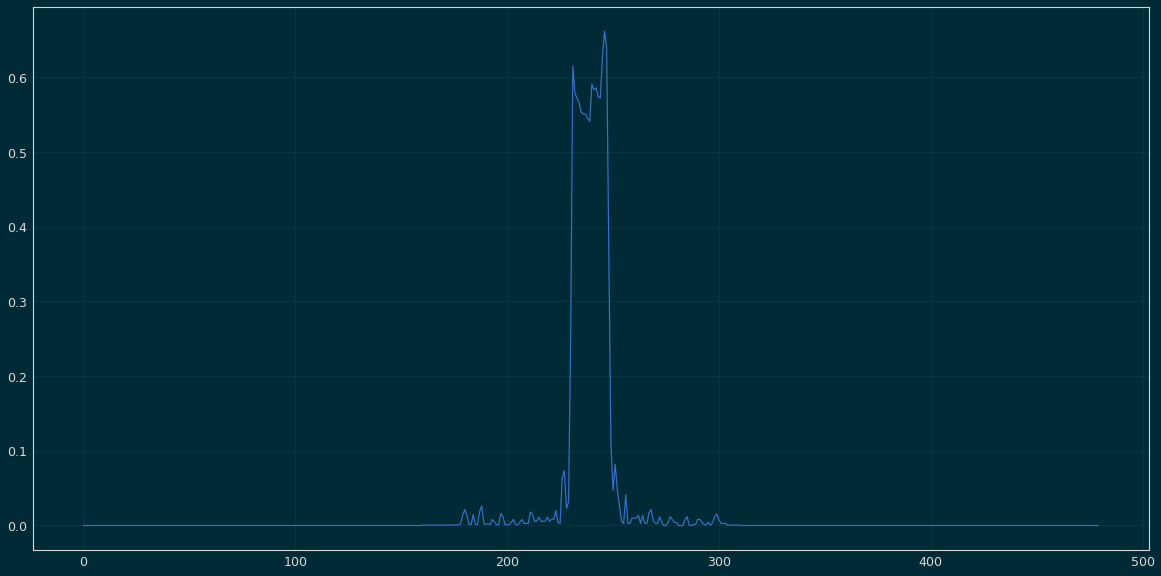

In [9]:
plot_line(moon_grey, 479)

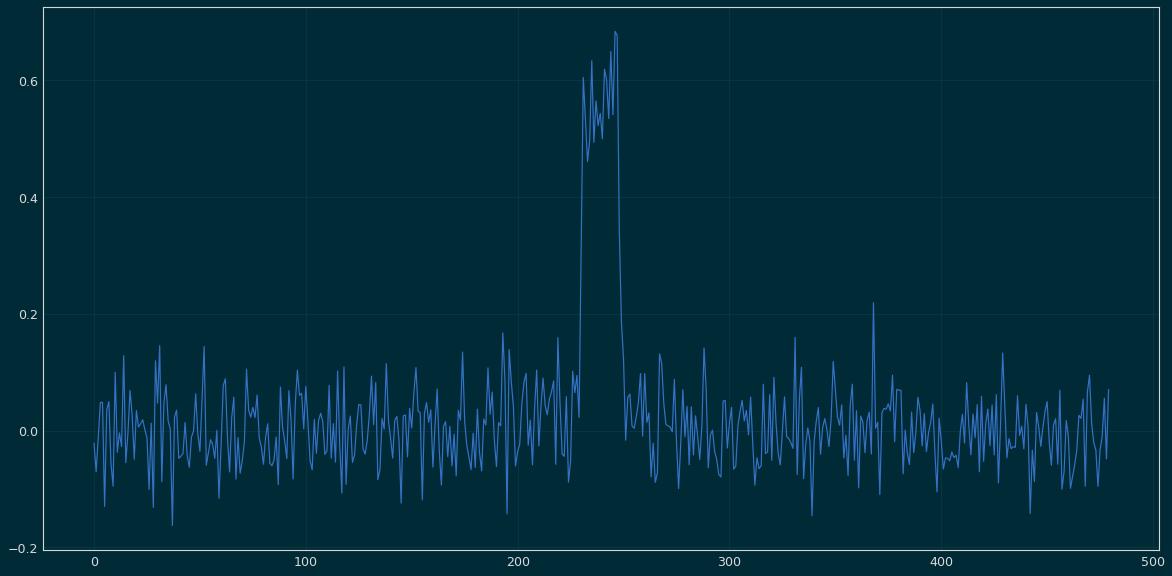

In [10]:
plot_line(noisy_moon, 479)

In [37]:
moon_grey.max()

1.0

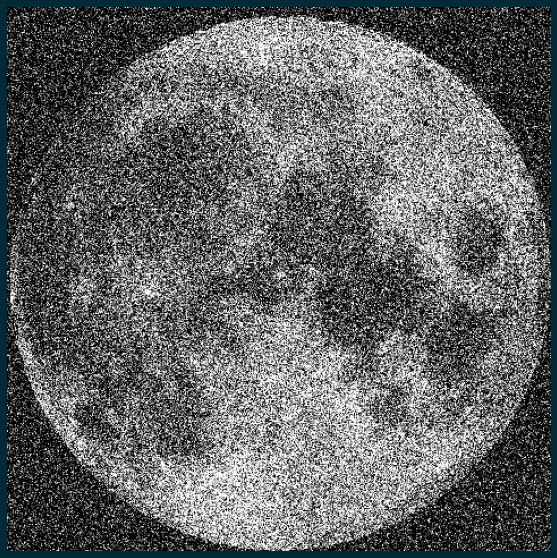

In [11]:
gaussian_moon2 = random_noise(moon_grey, 'gaussian', var = 0.2)
imshow_gray(gaussian_moon2)

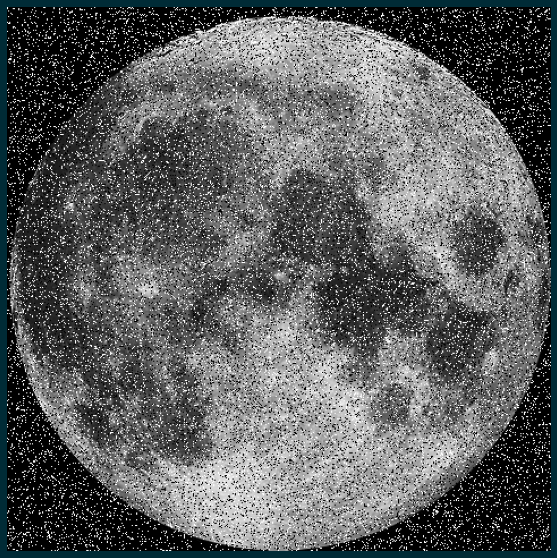

In [12]:
sp_moon3 = random_noise(moon_grey, 's&p', amount=0.2)
imshow_gray(sp_moon3)

### Removing the noise

In [15]:
%matplotlib tk
def avg_noise_out(img, N):
    noisy = np.zeros_like(img)
    out = np.zeros_like(img)
    noisy = random_noise(img, 'gaussian', var=0.2)
    
    f1, ax = plt.subplots(1,1)
    figure_ = ax.imshow(noisy, cmap=plt.cm.gray)
    plt.pause(0.3)

    for i in range(N+1):
        noisy = random_noise(img, 'gaussian', var=0.2)
        out += noisy
        figure_.set_data(noisy)
        noisy = np.zeros_like(img)
        f1.canvas.draw_idle()
        plt.pause(0.3)
    return out

In [45]:
img2 = avg_noise_out(moon_grey, 1000)
imshow_gray(img2)

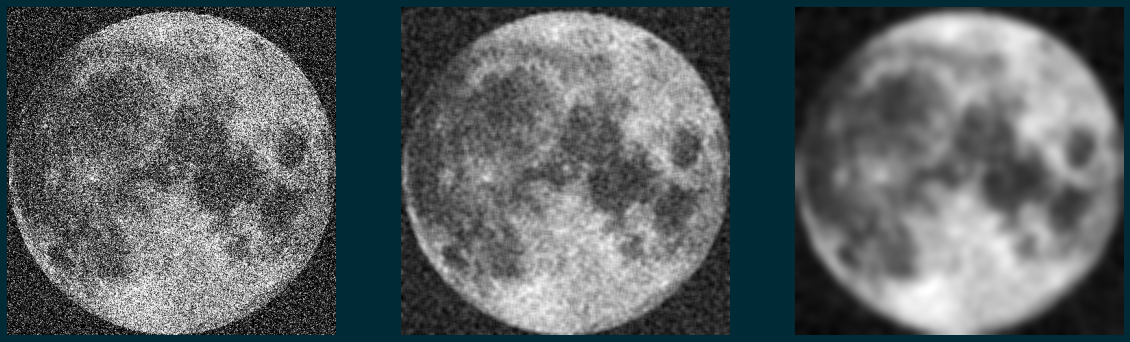

In [13]:
avg_filt_moon = uniform_filter(gaussian_moon2, 7)
gau_filt_moon = gaussian_filter(gaussian_moon2, 7)
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(gaussian_moon2, cmap=plt.cm.gray), plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(avg_filt_moon, cmap=plt.cm.gray), plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(gau_filt_moon, cmap=plt.cm.gray), plt.axis('off')
plt.show()

In [ ]:
def create_noisy_plots(noisy_image, kernel=5, row=1):
    avg_filter = uniform_filter(noisy_image, kernel)
    gau_filter = gaussian_filter(noisy_image, kernel)
    med_filter = median_filter(noisy_image, kernel)
#     plt.figure(figsize=(30,10))   
    pos = 0 if row == 1 else 4
    plt.subplot(2, 4, 1+pos)
    plt.imshow(noisy_image, cmap=plt.cm.gray), plt.axis('off')
    plt.title('Original noisy image')
    
    plt.subplot(2, 4, 2+pos)
    plt.imshow(avg_filter, cmap=plt.cm.gray), plt.axis('off')
    plt.title('Box filter')
    
    plt.subplot(2, 4, 3+pos)
    plt.imshow(gau_filter, cmap=plt.cm.gray), plt.axis('off')
    plt.title('Gaussian filter')
    
    plt.subplot(2, 4, 4+pos)
    plt.imshow(med_filter, cmap=plt.cm.gray), plt.axis('off')
    plt.title('med image')
  

create_noisy_plots(gaussian_moon2, kernel=5, row=1)
create_noisy_plots(sp_moon3, kernel=5, row=2)
   